# OpenABM-Covid19 - Example Manual Contact-Tracing

This examples demonstrates the effect of manual contact-tracing following testing. A well-staffed manual contract tracing service is turned on following the end of a lockdown period and moderate social-distancing measures are added (20% reduction in transmission for occupation and random interactions).

First we set the baseline parameters: change the population to 50k (`n_total=50000`); the test sensitivity to 90% (`test_sensitivity=0.9`);  . At the start of the simulation there is no self-isolation and we run the simulation for 25 days.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from COVID19.model import Model as abm

model = abm( params = { "n_total" : 50000, "test_sensitivity" : 0.9 } )
for t in range(25):
    model.one_time_step()

After 25 days we implement a general lockdown (default parameters) and also introducing self-isolation of (80%) of individuals showing symptoms and their households.

In [2]:
model.update_running_params("lockdown_on", 1)
model.update_running_params("self_quarantine_fraction", 0.8 )
model.update_running_params("quarantine_household_on_symptoms", 1)
for t in range(40):
    model.one_time_step()

Following the lockdown, we introduce manual contact-tracing (`manual_trace_on=1`) which is staffed by 50 workers (`manual_trace_n_workers=1`) and we assume when tracing 80% of occupational (`manual_traceable_fraction_occupation=0.8`) and 5% of random contacts (`manual_traceable_random_occupation=0.05`) are traced a day after receipt of a positive test (`manual_trace_delay=1`). We use the set up that symptomatic individuals who are self-isolating get tests (`test_on_symptoms=1`), tracing occurs following a positive test (`manual_trace_on_positive=1`) with those traced being asked to quarantine (`quarantine_on_traced=1`) and their household members also being asked to quarantined (`quarantine_household_on_traced_positive=1`). Social-distancing measures reduce the transmission rate by 20% in occupation and random interactions (`relative_transmission_occupation=0.8` etc.). We then the the simulation for another 50 days.

In [3]:
model.update_running_params("lockdown_on", 0)
model.update_running_params("manual_trace_on", 1 )
model.update_running_params("manual_trace_n_workers", 50 )
model.update_running_params("manual_trace_on_positive", 1 )
model.update_running_params("manual_trace_delay", 1 )
model.update_running_params("manual_traceable_fraction_occupation", 0.8 )
model.update_running_params("manual_traceable_fraction_random", 0.05 )
model.update_running_params("test_on_symptoms", 1)
model.update_running_params("test_order_wait", 0 )
model.update_running_params("test_result_wait", 1 )
model.update_running_params("quarantine_on_traced", 1)
model.update_running_params("quarantine_household_on_traced_positive", 1 )
model.update_running_params("relative_transmission_occupation", 0.8 )
model.update_running_params("relative_transmission_random", 0.8)
for t in range(50):
    model.one_time_step()
timeseries = model.results 
del( model );

We now re-run the simulation with all the same settings except without turning on the app for comparison.

In [4]:
model = abm( params = { "n_total" : 50000, "test_sensitivity" : 0.9 } )
for t in range(25):
    model.one_time_step()
model.update_running_params("lockdown_on", 1)
model.update_running_params("self_quarantine_fraction", 0.8 )
model.update_running_params("quarantine_household_on_symptoms", 1)
for t in range(40):
    model.one_time_step()
model.update_running_params("lockdown_on", 0)
model.update_running_params("relative_transmission_occupation", 0.8 )
model.update_running_params("relative_transmission_random", 0.8)
for t in range(50):
    model.one_time_step()
timeseries2 = model.results 
del( model );

Plot the number of daily new infections over the course of the simulation and compare the effect of adding manual contract-tracing post-lockdown.

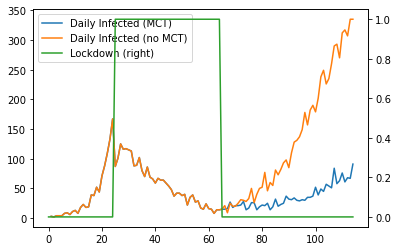

In [5]:
timeseries["daily_infected"] = timeseries["total_infected"].diff(1)
timeseries["daily_infected_base"] = timeseries2["total_infected"].diff(1)
plt.figure()
timeseries.daily_infected.plot( x = "time", legend = True, label = "Daily Infected (MCT)" )
timeseries.daily_infected_base.plot( x = "time", legend = True, label = "Daily Infected (no MCT)" )
timeseries.lockdown.plot( x = "time", legend = "True", secondary_y = True, label = "Lockdown" )